## Remove cancer type experiments

In our previous experiments, we were comparing pancancer mutation prediction (train a model on all cancer types, then test on a single cancer type) with single-cancer mutation prediction (train and test on the same single cancer type).

Here, we want to find out what happens to performance when we remove the relevant cancer type from the pancancer training set (i.e. train on all cancer types minus the one we test on). We plan to compare this with the pancancer results, under the assumption that this should be detrimental to performance.

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pancancer_evaluation.config as cfg
import pancancer_evaluation.utilities.analysis_utilities as au

In [2]:
single_cancer_dir = os.path.join(cfg.results_dir, 'single_cancer')
pancancer_dir = os.path.join(cfg.results_dir, 'pancancer')
remove_cancer_dir = os.path.join(cfg.results_dir, 'pancancer_only')

In [3]:
single_cancer_df = au.load_prediction_results(single_cancer_dir, 'single_cancer')
print(single_cancer_df.shape)
single_cancer_df.head()

(10464, 10)


,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,train_set,identifier
0,0.99987,0.99879,MAP3K1,BRCA,signal,42,train,0,single_cancer,MAP3K1_BRCA
1,0.72689,0.46638,MAP3K1,BRCA,signal,42,test,0,single_cancer,MAP3K1_BRCA
2,0.72844,0.38910,MAP3K1,BRCA,signal,42,cv,0,single_cancer,MAP3K1_BRCA
3,0.99860,0.98630,MAP3K1,BRCA,signal,42,train,1,single_cancer,MAP3K1_BRCA
4,0.74887,0.48700,MAP3K1,BRCA,signal,42,test,1,single_cancer,MAP3K1_BRCA


In [4]:
pancancer_df = au.load_prediction_results(pancancer_dir, 'pancancer')
print(pancancer_df.shape)
pancancer_df.head()

(10464, 10)


,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,train_set,identifier
0,0.95820,0.68399,MAP3K1,BRCA,signal,42,train,0,pancancer,MAP3K1_BRCA
1,0.69619,0.40796,MAP3K1,BRCA,signal,42,test,0,pancancer,MAP3K1_BRCA
2,0.62527,0.20878,MAP3K1,BRCA,signal,42,cv,0,pancancer,MAP3K1_BRCA
3,0.98367,0.82884,MAP3K1,BRCA,signal,42,train,1,pancancer,MAP3K1_BRCA
4,0.77170,0.44885,MAP3K1,BRCA,signal,42,test,1,pancancer,MAP3K1_BRCA


In [5]:
remove_cancer_df = au.load_prediction_results(remove_cancer_dir, 'pancancer_only')
print(remove_cancer_df.shape)
remove_cancer_df.head()

(10464, 10)


,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,train_set,identifier
0,0.99985,0.99861,MAP3K1,BRCA,signal,42,train,0,pancancer_only,MAP3K1_BRCA
1,0.71789,0.47920,MAP3K1,BRCA,signal,42,test,0,pancancer_only,MAP3K1_BRCA
2,0.72623,0.39968,MAP3K1,BRCA,signal,42,cv,0,pancancer_only,MAP3K1_BRCA
3,0.99901,0.99020,MAP3K1,BRCA,signal,42,train,1,pancancer_only,MAP3K1_BRCA
4,0.74763,0.49074,MAP3K1,BRCA,signal,42,test,1,pancancer_only,MAP3K1_BRCA


In [6]:
experiment_comparison_df = au.compare_results(single_cancer_df,
                                              pancancer_df=remove_cancer_df,
                                              identifier='identifier',
                                              metric='aupr',
                                              correction=False,
                                              verbose=False)
experiment_comparison_df.sort_values(by='p_value').head(n=15)

,identifier,delta_mean,p_value
360,SF3B1_BLCA,0.012064,0.083391
103,NF1_BLCA,0.027200,0.114845
364,STAG2_UCEC,-0.318292,0.214902
327,BCOR_LUAD,-0.012609,0.280791
315,EGFR_STAD,-0.141367,0.305119
19,CASP8_UCEC,-0.008374,0.321370
296,TSHR_UCEC,0.024031,0.341043
401,HNF1A_UCEC,0.117803,0.357306
253,PIK3CA_BLCA,-0.029052,0.358829
312,PTEN_COAD,0.042227,0.364512


Text(0.5, 1.0, 'Comparison of pan-cancer and single-cancer results, Vogelstein genes')

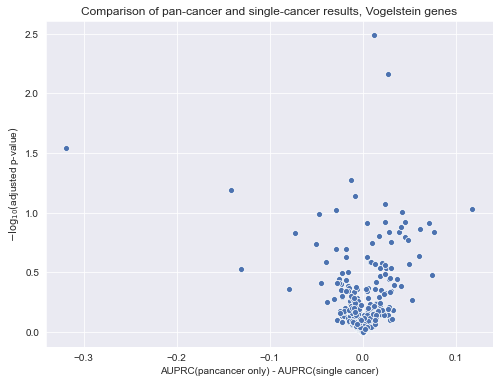

In [7]:
experiment_comparison_df['nlog10_p'] = -np.log(experiment_comparison_df.p_value)

sns.set({'figure.figsize': (8, 6)})
sns.scatterplot(data=experiment_comparison_df, x='delta_mean', y='nlog10_p')
plt.xlabel('AUPRC(pancancer only) - AUPRC(single cancer)')
plt.ylabel(r'$-\log_{10}($adjusted p-value$)$')
plt.title('Comparison of pan-cancer and single-cancer results, Vogelstein genes')

In [8]:
experiment_comparison_df = au.compare_results(pancancer_df,
                                              pancancer_df=remove_cancer_df,
                                              identifier='identifier',
                                              metric='aupr',
                                              correction=False,
                                              verbose=False)
experiment_comparison_df.sort_values(by='p_value').head(n=25)

,identifier,delta_mean,p_value
147,BRAF_SKCM,0.258680,0.000588
178,PTEN_BLCA,-0.224705,0.000610
137,NF1_UCEC,-0.305060,0.000732
355,NF1_SARC,-0.480423,0.002015
428,SMAD4_HNSC,-0.327763,0.002369
192,JAK2_UCEC,-0.424548,0.002681
278,SMAD4_CESC,-0.606137,0.003134
274,SPOP_PRAD,0.423745,0.003392
54,PTEN_STAD,-0.270193,0.008031
363,PIK3CA_UCEC,-0.084020,0.009122


In [9]:
results_dir = '/home/jake/data/pancancer_vogelstein_09_25'
pancancer_comparison_df = pd.read_csv(os.path.join(results_dir, 'pancancer_pvals.tsv'),
                                      index_col=False, sep='\t')
overlap = experiment_comparison_df.index.intersection(pancancer_comparison_df.index)
experiment_sig_df = (
    experiment_comparison_df.reindex(overlap)
                            .assign(reject_shuffled_null=pancancer_comparison_df.reject_null)
)
experiment_sig_df.sort_values(by='p_value').head(n=15)

,identifier,delta_mean,p_value,reject_shuffled_null
147,BRAF_SKCM,0.258680,0.000588,False
178,PTEN_BLCA,-0.224705,0.000610,False
137,NF1_UCEC,-0.305060,0.000732,True
355,NF1_SARC,-0.480423,0.002015,True
192,JAK2_UCEC,-0.424548,0.002681,False
278,SMAD4_CESC,-0.606137,0.003134,False
274,SPOP_PRAD,0.423745,0.003392,False
54,PTEN_STAD,-0.270193,0.008031,True
363,PIK3CA_UCEC,-0.084020,0.009122,True
119,FBXW7_CESC,-0.266079,0.010974,True


Text(0.5, 1.0, 'Comparison of "pan-cancer only" and pan-cancer results, Vogelstein genes')

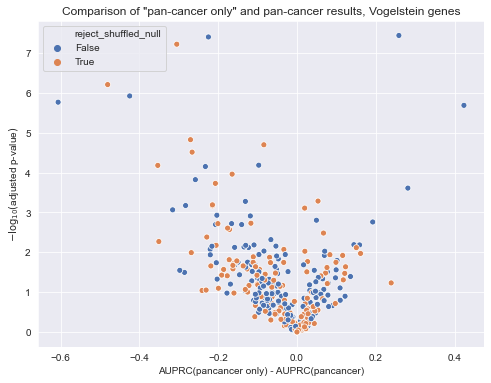

In [18]:
experiment_sig_df['nlog10_p'] = -np.log(experiment_sig_df.p_value)

sns.set({'figure.figsize': (8, 6)})
sns.scatterplot(data=experiment_sig_df, x='delta_mean', y='nlog10_p', hue='reject_shuffled_null')
plt.xlabel('AUPRC(pancancer only) - AUPRC(pancancer)')
plt.ylabel(r'$-\log_{10}($adjusted p-value$)$')
plt.title('Comparison of "pan-cancer only" and pan-cancer results, Vogelstein genes')

Text(0.5, 1.0, 'Highlight TP53_BRCA in comparison plot')

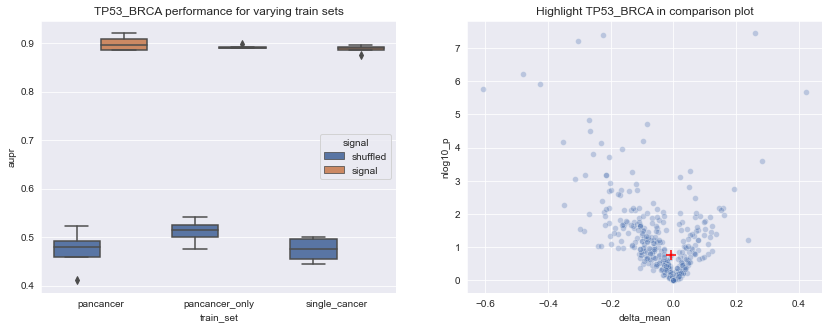

In [31]:
plot_identifier = 'BRAF_SKCM'

results_df = pd.concat((
    single_cancer_df, pancancer_df, remove_cancer_df
))
plot_df = results_df[
    (results_df.identifier == plot_identifier) &
    (results_df.data_type == 'test')
].sort_values(by=['signal', 'train_set'])

sns.set({'figure.figsize': (14, 5)})
fig, axarr = plt.subplots(1, 2)
sns.boxplot(data=plot_df, x='train_set', y='aupr', hue='signal', ax=axarr[0])
sns.scatterplot(data=experiment_sig_df, x='delta_mean', y='nlog10_p',
                alpha=0.3, ax=axarr[1])

def highlight_id(x, y, val, ax, id_to_plot):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        if point['val'] == id_to_plot:
            ax.scatter(point['x'], point['y'], color='red', marker='+', s=100)
        
highlight_id(experiment_sig_df.delta_mean, experiment_sig_df.nlog10_p,
             experiment_sig_df.identifier, axarr[1], plot_identifier)

axarr[0].set_title('{} performance for varying train sets'.format(plot_identifier))
axarr[1].set_title('Highlight {} in comparison plot'.format(plot_identifier))